<a href="https://colab.research.google.com/github/Tejavenkat2004/Heart-prediction/blob/main/Heart_prediction(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (1025, 17)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
 14  bmi       1025 non-null   float64
 15  smoking   1025 non-null   int64  
 16  diabetes  1025 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 136.3 KB

Summary statistics:
               age          sex      

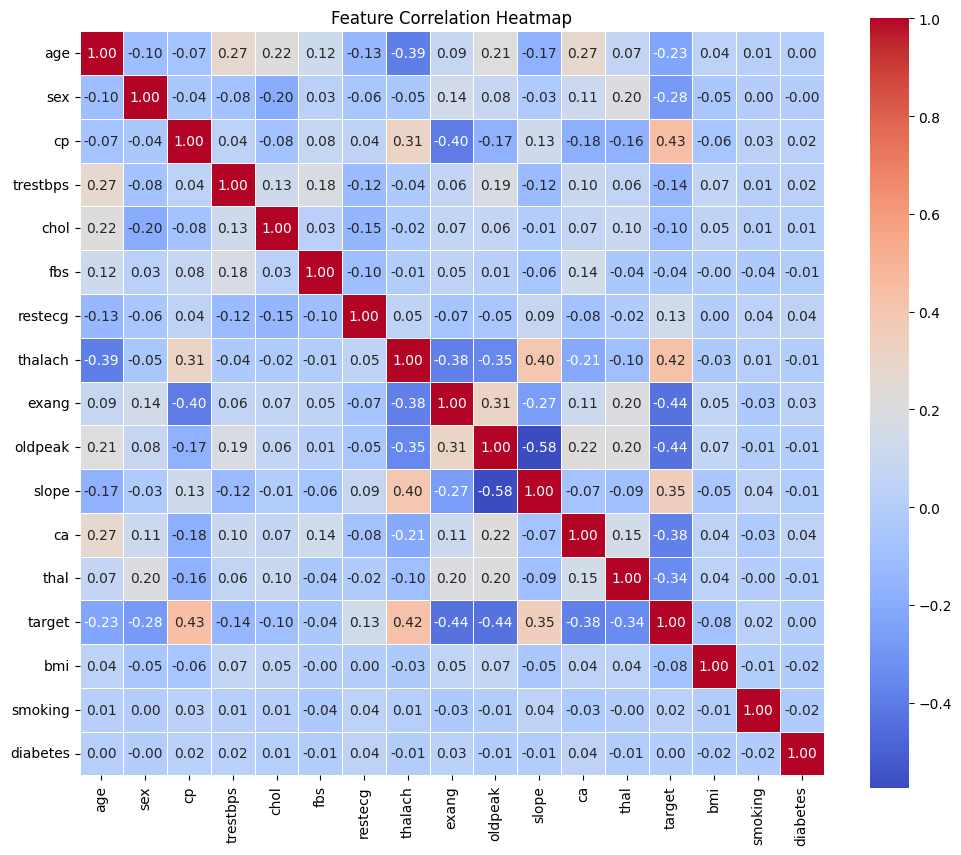


Data ready for modeling.
Training samples: 717, Testing samples: 308


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart.csv')

np.random.seed(42)
df['bmi'] = np.random.normal(27, 4, size=len(df))
df['smoking'] = np.random.choice([0,1], size=len(df))
df['diabetes'] = np.random.choice([0,1], size=len(df))

df.fillna(df.median(), inplace=True)

print(f"Dataset shape: {df.shape}")

print("\nDataset info:")
df.info()

print("\nSummary statistics:")
print(df.describe())

print("\nTarget column distribution:")
print(df['target'].value_counts(normalize=True))

print("\nUnique values in categorical features:")
for col in ['sex', 'smoking', 'diabetes']:
    print(f"{col}: {df[col].unique()}")

corr_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("\nData ready for modeling.")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Random Forest best params: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'feature_selection__k': 8}
Random Forest accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       149

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



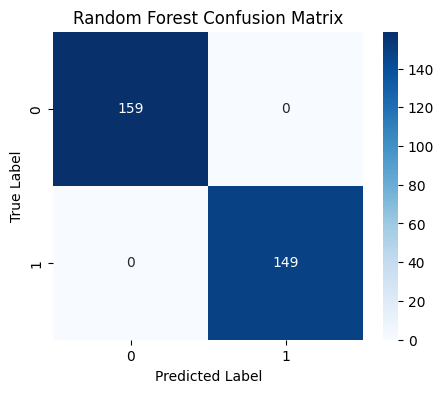

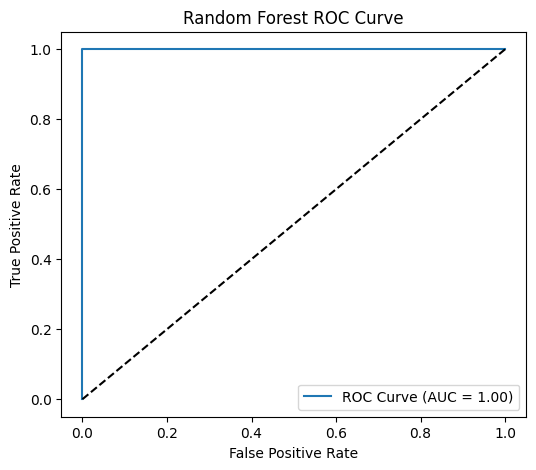

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

rf_pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'feature_selection__k': [8, 10, 13, X.shape[1]],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print(f"Random Forest best params: {grid_rf.best_params_}")
print(f"Random Forest accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Logistic Regression best params: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'feature_selection__n_features_to_select': 10}
Logistic Regression accuracy: 0.82
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       159
           1       0.77      0.90      0.83       149

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.83      0.82      0.82       308



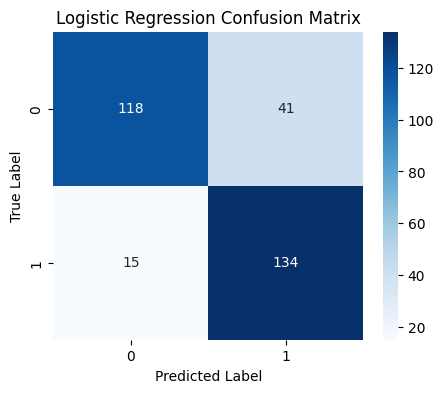

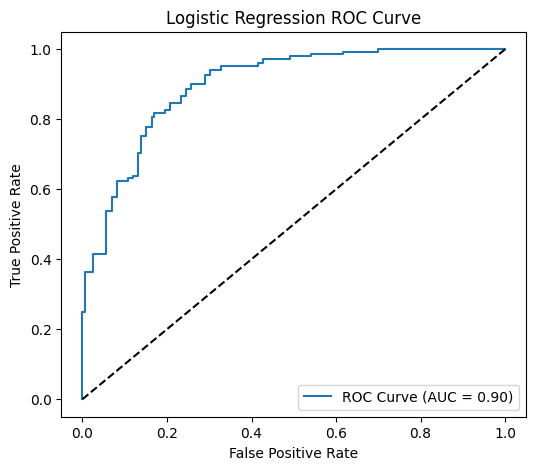

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

lr_pipeline = Pipeline([
    ('feature_selection', RFE(LogisticRegression(max_iter=1000))),
    ('classifier', LogisticRegression(max_iter=1000))
])

param_grid_lr = {
    'feature_selection__n_features_to_select': [8, 10, 13],
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}

grid_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

print(f"Logistic Regression best params: {grid_lr.best_params_}")
print(f"Logistic Regression accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_prob = best_lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


SVM best params: {'classifier__C': 10, 'classifier__kernel': 'rbf', 'feature_selection__k': 13}
SVM accuracy: 0.97
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       159
           1       0.99      0.95      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



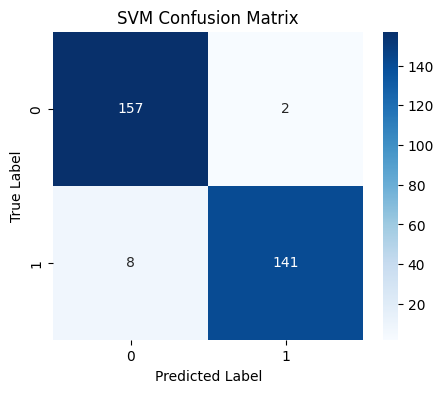

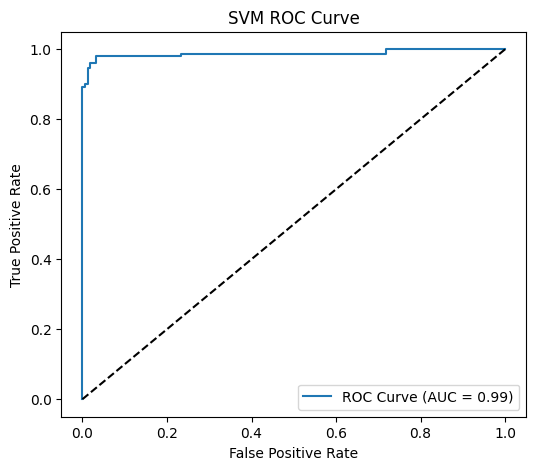

In [6]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

svm_pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', SVC(probability=True))
])

param_grid_svm = {
    'feature_selection__k': [8, 10, 13],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

grid_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print(f"SVM best params: {grid_svm.best_params_}")
print(f"SVM accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(classification_report(y_test, y_pred_svm))


cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_prob = best_svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


KNN best params: {'classifier__n_neighbors': 7, 'classifier__weights': 'distance', 'feature_selection__k': 10}
KNN accuracy: 0.98
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



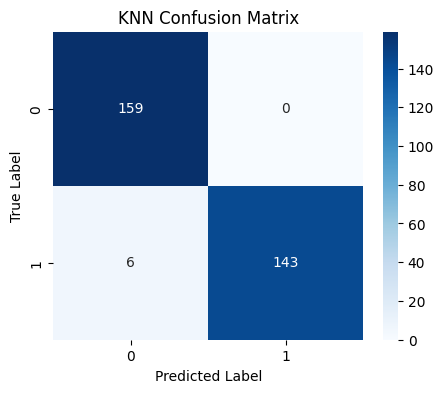

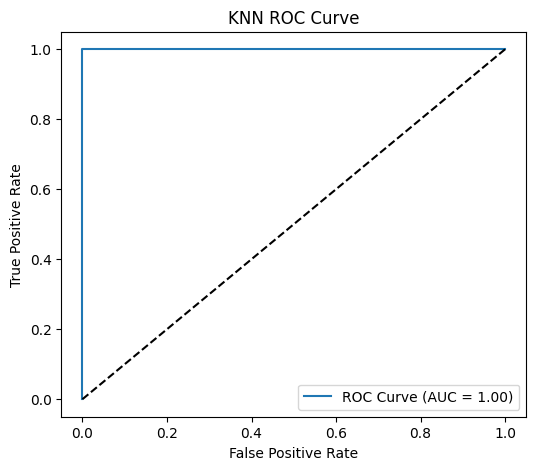

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

knn_pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', KNeighborsClassifier())
])

param_grid_knn = {
    'feature_selection__k': [8, 10, 13],
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, n_jobs=-1)
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print(f"KNN best params: {grid_knn.best_params_}")
print(f"KNN accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(classification_report(y_test, y_pred_knn))


cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_prob = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Decision Tree best params: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'feature_selection__n_features_to_select': 8}
Decision Tree accuracy: 0.97
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



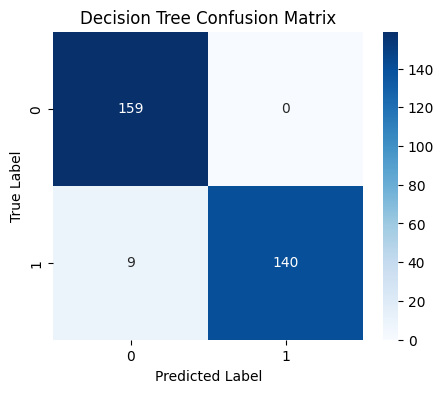

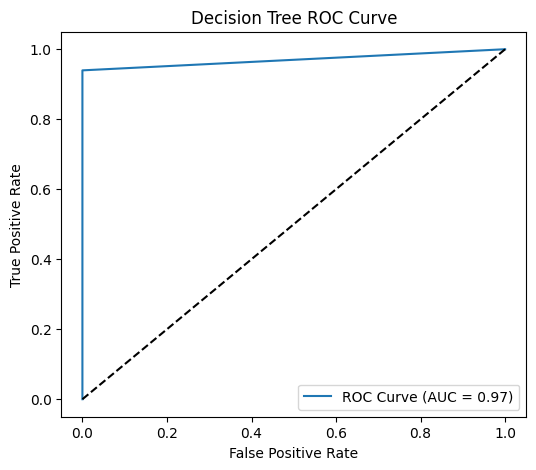

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

dt_pipeline = Pipeline([
    ('feature_selection', RFE(DecisionTreeClassifier(random_state=42))),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'feature_selection__n_features_to_select': [8, 10, 13],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, n_jobs=-1)
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print(f"Decision Tree best params: {grid_dt.best_params_}")
print(f"Decision Tree accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(classification_report(y_test, y_pred_dt))


cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_prob = best_dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('Decision Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
